## 安装R包
镜像可能未能包含你需要的所有包

In [1]:
install.packages("forecast")

also installing the dependency ‘urca’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## 2. 引入需要的包

In [ ]:
library("forecast")

## 3. 基本设置
如果需要，可以做一些基本设置

In [42]:
options(warn = -1)  #不显示告警信息

## 4. 读取数据

In [43]:
list.files("../data")   #检验目录是否正确

[1] "FamaFrench.csv"    "gm-ws-b.us.txt"    "gmre_a.us.txt"    
 [4] "gmre.us.txt"       "gms.us.txt"        "gmta.us.txt"      
 [7] "gmz.us.txt"        "gnbc.us.txt"       "gnc.us.txt"       
[10] "gnca.us.txt"       "gncma.us.txt"      "gne_a.us.txt"     
[13] "gne.us.txt"        "gnk.us.txt"        "gnl_a.us.txt"     
[16] "gnl.us.txt"        "gnmk.us.txt"       "gnmx.us.txt"      
[19] "gnrc.us.txt"       "gnrt.us.txt"       "gnrx.us.txt"      
[22] "gnst.us.txt"       "gnt_a.us.txt"      "gnt.us.txt"       
[25] "gntx.us.txt"       "gnty.us.txt"       "gnus.us.txt"      
[28] "gnw.us.txt"        "goau.us.txt"       "goex.us.txt"      
[31] "gof.us.txt"        "gogl.us.txt"       "gogo.us.txt"      
[34] "gol.us.txt"        "gold.us.txt"       "golf.us.txt"      
[37] "good.us.txt"       "goodm.us.txt"      "goodo.us.txt"     
[40] "goodp.us.txt"      "goog.us.txt"       "shampoo-sales.csv"

In [45]:
#dataframe结构
data<-read.csv(file = "../data/gmre_a.us.txt")
head(data)

Date,Open,High,Low,Close,Volume,OpenInt
2017-09-21,24.9400,24.96,24.8000,24.80,144226,0
2017-09-22,24.8101,24.90,24.8100,24.90,35452,0
2017-09-25,24.9800,24.98,24.8800,24.91,62443,0
2017-09-26,24.9400,24.94,24.8800,24.88,22618,0
2017-09-27,24.8800,24.88,24.8001,24.85,33070,0
2017-09-28,24.8500,24.94,24.8300,24.85,59192,0


## 5. 数据探索
了解你数据

In [32]:
summary(data)

         Date          Open             High             Low        
 2014-03-27:  1   Min.   : 494.6   Min.   : 496.0   Min.   : 487.6  
 2014-03-28:  1   1st Qu.: 560.5   1st Qu.: 565.1   1st Qu.: 555.6  
 2014-03-31:  1   Median : 710.8   Median : 718.4   Median : 703.5  
 2014-04-01:  1   Mean   : 702.9   Mean   : 708.1   Mean   : 697.1  
 2014-04-02:  1   3rd Qu.: 793.8   3rd Qu.: 798.1   3rd Qu.: 787.9  
 2014-04-03:  1   Max.   :1034.0   Max.   :1048.4   Max.   :1028.5  
 (Other)   :910                                                     
     Close            Volume            OpenInt 
 Min.   : 492.6   Min.   :    7932   Min.   :0  
 1st Qu.: 559.8   1st Qu.: 1173610   1st Qu.:0  
 Median : 711.0   Median : 1511322   Median :0  
 Mean   : 702.8   Mean   : 1725988   Mean   :0  
 3rd Qu.: 794.3   3rd Qu.: 1988164   3rd Qu.:0  
 Max.   :1039.8   Max.   :11164900   Max.   :0  
                                                

## 6. 数据处理

In [47]:
data<-data[,c("Date","Close")] #筛选字段

## 7. 建模

In [49]:
#模型参数
print(auto.arima(data$Close))

Series: data$Close 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.5771
s.e.   0.1380

sigma^2 estimated as 0.003261:  log likelihood=52.38
AIC=-100.77   AICc=-100.41   BIC=-97.6


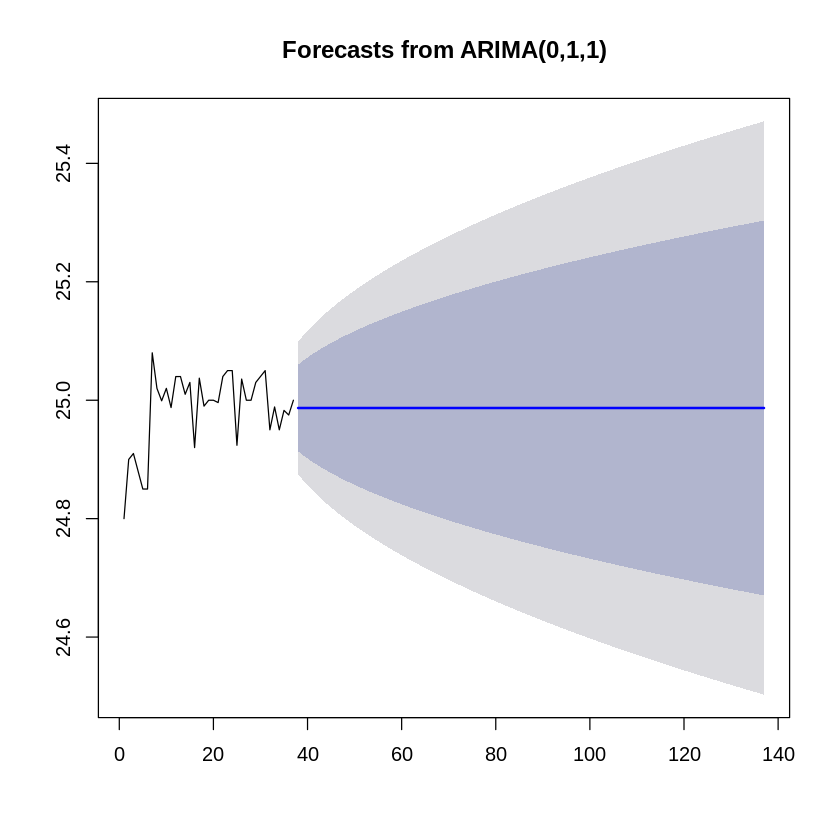

In [50]:
#预测和可视化
fit <- auto.arima(data["Close"])
plot(forecast(fit,h=100))